<a href="https://colab.research.google.com/github/chingyaousf/Intern-project-2023/blob/main/scripts/MLpredictionDep_05_Model_KNN_NQO1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DeepDEP/filtered_arranged_table.csv")
data

,DepMap_ID,A1BG (1) Exp,A1CF (29974) Exp,A2M (2) Exp,A2ML1 (144568) Exp,A3GALT2 (127550) Exp,A4GALT (53947) Exp,A4GNT (51146) Exp,AAAS (8086) Exp,AACS (65985) Exp,...,ZYG11A (440590) Exp,ZYG11B (79699) Exp,ZYX (7791) Exp,ZZEF1 (23140) Exp,ZZZ3 (26009) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000001,3.116032,0.056584,0.226509,0.111031,0.000000,1.035624,0.176323,5.700440,4.144046,...,3.282440,2.797013,6.821455,3.010780,4.381975,0.018546,0.807414,0.076613,1.000000,0.020657
1,ACH-000004,4.178715,0.000000,0.214125,0.344828,0.070389,0.097611,0.000000,6.336819,3.231125,...,0.014355,2.032101,7.002252,3.444932,4.910733,0.044907,0.999985,0.061617,1.000000,0.049385
2,ACH-000005,4.003602,0.014355,0.137504,0.014355,0.000000,0.028569,0.000000,6.337176,3.781360,...,0.014355,2.761285,6.826421,3.524816,5.592457,0.009301,1.000000,0.049535,0.994004,0.015969
3,ACH-000007,0.137504,1.405992,0.201634,0.000000,0.000000,0.014355,0.000000,5.431289,4.300856,...,0.014355,1.989139,6.332708,3.673556,3.469886,0.058868,0.999620,0.036902,0.999886,0.041706
4,ACH-000009,1.464668,3.586164,0.250962,0.000000,0.042644,4.525443,0.000000,5.674122,4.510962,...,1.356144,2.956057,7.853185,3.442280,3.351911,0.040590,0.979828,0.006602,0.973598,0.034535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,1.967169,0.000000,2.198494,0.000000,0.000000,1.490570,0.000000,5.300490,4.314697,...,0.014355,4.173127,6.560256,2.969012,5.276869,0.038095,0.701928,0.161286,1.000000,0.136197
1001,ACH-002800,3.847997,0.000000,5.899901,0.321928,0.000000,3.206331,0.000000,5.831877,3.822730,...,0.622930,3.084064,6.596935,3.177918,4.847997,0.177952,0.462993,0.054260,1.000000,0.022899
1002,ACH-002834,1.819668,0.014355,0.014355,0.201634,0.000000,2.912650,0.028569,5.646451,4.547820,...,1.400538,2.568032,6.953498,3.087463,4.226509,0.002074,0.911326,0.022301,0.998623,0.013754
1003,ACH-002847,2.990955,0.000000,7.608440,0.014355,0.000000,0.584963,0.000000,5.104337,4.228819,...,1.480265,2.748461,7.432041,2.903038,4.660495,0.161273,0.704900,0.184386,0.999903,0.058351


In [ ]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/NQO1_gt_00.csv")
data

,DepMap_ID,A1BG (1) Exp,A3GALT2 (127550) Exp,A4GNT (51146) Exp,AADAC (13) Exp,AADACL4 (343066) Exp,AAGAB (79719) Exp,AAK1 (22848) Exp,AANAT (15) Exp,AAR2 (25980) Exp,...,ZXDB (158586) Exp,ZYG11B (79699) Exp,ZYX (7791) Exp,ZZEF1 (23140) Exp,ZZZ3 (26009) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000001,3.116032,0.000000,0.176323,0.790772,0.000000,5.752213,3.078951,0.970854,5.096768,...,1.914565,2.797013,6.821455,3.010780,4.381975,0.018546,0.807414,0.076613,1.000000,0.020657
1,ACH-000004,4.178715,0.070389,0.000000,0.000000,0.000000,4.416164,2.292782,0.000000,5.209843,...,1.622930,2.032101,7.002252,3.444932,4.910733,0.044907,0.999985,0.061617,1.000000,0.049385
2,ACH-000005,4.003602,0.000000,0.000000,0.000000,0.000000,4.791293,2.625270,0.056584,5.793896,...,1.773996,2.761285,6.826421,3.524816,5.592457,0.009301,1.000000,0.049535,0.994004,0.015969
3,ACH-000007,0.137504,0.000000,0.000000,3.547203,0.000000,5.053546,1.970854,0.454176,3.957915,...,1.761285,1.989139,6.332708,3.673556,3.469886,0.058868,0.999620,0.036902,0.999886,0.041706
4,ACH-000009,1.464668,0.042644,0.000000,1.985500,0.000000,5.246028,3.397803,0.000000,5.878480,...,2.176323,2.956057,7.853185,3.442280,3.351911,0.040590,0.979828,0.006602,0.973598,0.034535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,1.967169,0.000000,0.000000,0.042644,0.000000,6.511278,3.819668,0.014355,4.983222,...,2.817623,4.173127,6.560256,2.969012,5.276869,0.038095,0.701928,0.161286,1.000000,0.136197
1001,ACH-002800,3.847997,0.000000,0.000000,1.443607,0.333424,5.974759,4.034744,0.000000,5.234578,...,2.634593,3.084064,6.596935,3.177918,4.847997,0.177952,0.462993,0.054260,1.000000,0.022899
1002,ACH-002834,1.819668,0.000000,0.028569,0.000000,0.042644,5.193378,4.133399,0.150560,4.958379,...,3.224966,2.568032,6.953498,3.087463,4.226509,0.002074,0.911326,0.022301,0.998623,0.013754
1003,ACH-002847,2.990955,0.000000,0.000000,0.000000,0.000000,5.491532,3.396434,0.000000,4.072106,...,1.867896,2.748461,7.432041,2.903038,4.660495,0.161273,0.704900,0.184386,0.999903,0.058351


In [ ]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/NQO1_gt_01.csv")
data

,DepMap_ID,ABCA10 (10349) Exp,AFAP1 (60312) Exp,AKIP1 (56672) Exp,ANXA1 (301) Exp,ARL14EPL (644100) Exp,ATG7 (10533) Exp,ATP6V1D (51382) Exp,AXL (558) Exp,BBX (56987) Exp,...,UCN2 (90226) Exp,WARS1 (7453) Exp,WDR25 (79446) Exp,WDR36 (134430) Exp,ZBTB8OS (339487) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000001,0.137504,5.688180,5.518850,9.749836,0.028569,3.801159,6.102448,1.263034,4.969473,...,0.495695,7.166916,3.040892,3.377124,5.953964,0.018546,0.807414,0.076613,1.000000,0.020657
1,ACH-000004,0.000000,0.422233,4.385431,5.609105,0.000000,3.590961,3.676944,0.226509,3.915521,...,0.163499,8.483050,2.863938,3.757023,5.743623,0.044907,0.999985,0.061617,1.000000,0.049385
2,ACH-000005,0.137504,0.941106,4.482203,6.268097,0.000000,3.620586,4.164304,0.275007,4.444932,...,0.042644,6.757157,2.319040,4.631104,5.865424,0.009301,1.000000,0.049535,0.994004,0.015969
3,ACH-000007,0.422233,2.809414,5.092969,7.641474,0.000000,3.961623,5.167519,0.201634,1.238787,...,0.000000,6.201046,2.550901,3.867896,5.450881,0.058868,0.999620,0.036902,0.999886,0.041706
4,ACH-000009,0.000000,3.662205,5.040454,5.807097,0.000000,3.788686,5.973152,0.903038,0.713696,...,0.163499,6.817495,2.173127,4.434295,5.403609,0.040590,0.979828,0.006602,0.973598,0.034535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,0.189034,5.814807,4.307429,8.608587,0.176323,5.237258,7.034084,8.576900,4.985045,...,1.292782,7.470700,2.477677,4.114367,6.604516,0.038095,0.701928,0.161286,1.000000,0.136197
1001,ACH-002800,0.985500,4.435629,4.211791,9.071516,0.443607,4.953731,6.809414,6.085340,4.655924,...,0.839960,8.205060,3.752749,3.365972,6.129283,0.177952,0.462993,0.054260,1.000000,0.022899
1002,ACH-002834,1.150560,4.187451,4.595742,8.909683,0.378512,4.414812,6.268846,8.477111,3.743084,...,4.123501,7.943746,2.543496,3.426265,5.549053,0.002074,0.911326,0.022301,0.998623,0.013754
1003,ACH-002847,0.150560,4.386121,5.684538,9.519518,0.176323,5.284292,6.668885,7.760687,3.960697,...,1.226509,7.662633,3.200065,3.877744,6.114992,0.161273,0.704900,0.184386,0.999903,0.058351


In [ ]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/NQO1_ng_01.csv")
data

,DepMap_ID,ABCC6 (368) Exp,ADRA2C (152) Exp,AIF1 (199) Exp,ANKRD33 (341405) Exp,ANKRD46 (157567) Exp,APRT (353) Exp,ARID3B (10620) Exp,ARRB1 (408) Exp,ART5 (116969) Exp,...,VSIG4 (11326) Exp,VWA2 (340706) Exp,ZNF687 (57592) Exp,ZNF711 (7552) Exp,ZSCAN18 (65982) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000001,1.232661,1.899176,0.250962,0.310340,3.201634,6.608661,2.459432,2.673556,1.739848,...,0.000000,0.963474,4.738768,3.537296,4.755422,0.018546,0.807414,0.076613,1.000000,0.020657
1,ACH-000004,1.925999,0.000000,9.531440,0.000000,4.626439,7.289558,4.887525,6.797272,0.028569,...,0.238787,0.000000,4.181898,4.369466,0.238787,0.044907,0.999985,0.061617,1.000000,0.049385
2,ACH-000005,1.124328,0.000000,9.786139,0.000000,5.555203,7.349967,4.856488,6.717402,0.000000,...,0.176323,0.014355,3.949535,4.244887,0.632268,0.009301,1.000000,0.049535,0.994004,0.015969
3,ACH-000007,3.423578,0.464668,0.000000,0.000000,3.040892,7.304420,2.077243,3.744161,0.028569,...,0.000000,4.632850,3.854993,1.769772,0.028569,0.058868,0.999620,0.036902,0.999886,0.041706
4,ACH-000009,3.519793,1.157044,1.807355,0.000000,4.166715,7.651052,4.470537,5.242221,0.056584,...,0.000000,0.137504,3.675816,2.845992,0.042644,0.040590,0.979828,0.006602,0.973598,0.034535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,0.565597,0.344828,0.000000,0.000000,3.596935,5.379898,2.464668,0.464668,0.150560,...,0.000000,0.000000,2.950468,0.111031,4.568640,0.038095,0.701928,0.161286,1.000000,0.136197
1001,ACH-002800,1.722466,0.000000,2.375735,0.422233,3.171527,5.983222,2.389567,2.500802,1.618239,...,0.000000,0.250962,3.109361,2.192194,2.356144,0.177952,0.462993,0.054260,1.000000,0.022899
1002,ACH-002834,0.400538,0.839960,0.150560,0.000000,2.996389,5.870118,1.627607,1.978196,1.124328,...,0.000000,0.124328,3.458119,3.528571,3.701549,0.002074,0.911326,0.022301,0.998623,0.013754
1003,ACH-002847,1.584963,0.887525,0.000000,0.000000,2.989139,6.354558,1.327687,3.548437,0.176323,...,0.000000,0.014355,3.704872,0.790772,2.831877,0.161273,0.704900,0.184386,0.999903,0.058351


In [ ]:
from numpy import true_divide
# Cleaning Column Names
clean_column_names = {}
for column in data.columns:
    clean_column_names[column] = column.strip().replace(' ', '_').replace('(', '').replace(')', '')

data.rename(columns=clean_column_names, inplace=True)
data

,DepMap_ID,ABCC6_368_Exp,ADRA2C_152_Exp,AIF1_199_Exp,ANKRD33_341405_Exp,ANKRD46_157567_Exp,APRT_353_Exp,ARID3B_10620_Exp,ARRB1_408_Exp,ART5_116969_Exp,...,VSIG4_11326_Exp,VWA2_340706_Exp,ZNF687_57592_Exp,ZNF711_7552_Exp,ZSCAN18_65982_Exp,EIF2AK3_9451_Dep,MYC_4609_Dep,NQO1_1728_Dep,SF3B1_23451_Dep,SQSTM1_8878_Dep
0,ACH-000001,1.232661,1.899176,0.250962,0.310340,3.201634,6.608661,2.459432,2.673556,1.739848,...,0.000000,0.963474,4.738768,3.537296,4.755422,0.018546,0.807414,0.076613,1.000000,0.020657
1,ACH-000004,1.925999,0.000000,9.531440,0.000000,4.626439,7.289558,4.887525,6.797272,0.028569,...,0.238787,0.000000,4.181898,4.369466,0.238787,0.044907,0.999985,0.061617,1.000000,0.049385
2,ACH-000005,1.124328,0.000000,9.786139,0.000000,5.555203,7.349967,4.856488,6.717402,0.000000,...,0.176323,0.014355,3.949535,4.244887,0.632268,0.009301,1.000000,0.049535,0.994004,0.015969
3,ACH-000007,3.423578,0.464668,0.000000,0.000000,3.040892,7.304420,2.077243,3.744161,0.028569,...,0.000000,4.632850,3.854993,1.769772,0.028569,0.058868,0.999620,0.036902,0.999886,0.041706
4,ACH-000009,3.519793,1.157044,1.807355,0.000000,4.166715,7.651052,4.470537,5.242221,0.056584,...,0.000000,0.137504,3.675816,2.845992,0.042644,0.040590,0.979828,0.006602,0.973598,0.034535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,0.565597,0.344828,0.000000,0.000000,3.596935,5.379898,2.464668,0.464668,0.150560,...,0.000000,0.000000,2.950468,0.111031,4.568640,0.038095,0.701928,0.161286,1.000000,0.136197
1001,ACH-002800,1.722466,0.000000,2.375735,0.422233,3.171527,5.983222,2.389567,2.500802,1.618239,...,0.000000,0.250962,3.109361,2.192194,2.356144,0.177952,0.462993,0.054260,1.000000,0.022899
1002,ACH-002834,0.400538,0.839960,0.150560,0.000000,2.996389,5.870118,1.627607,1.978196,1.124328,...,0.000000,0.124328,3.458119,3.528571,3.701549,0.002074,0.911326,0.022301,0.998623,0.013754
1003,ACH-002847,1.584963,0.887525,0.000000,0.000000,2.989139,6.354558,1.327687,3.548437,0.176323,...,0.000000,0.014355,3.704872,0.790772,2.831877,0.161273,0.704900,0.184386,0.999903,0.058351


In [ ]:
# Exclude 'DepMap_ID' column
data_without_id = data.drop(columns=['DepMap_ID'])

# Extracting Features and Targets
features = data_without_id.drop(columns=[col for col in data_without_id.columns if 'Dep' in col])
# targets = data_without_id[[col for col in data_without_id.columns if 'Dep' in col]]
targets = data_without_id[["NQO1_1728_Dep"]]

targets

,NQO1_1728_Dep
0,0.076613
1,0.061617
2,0.049535
3,0.036902
4,0.006602
...,...
1000,0.161286
1001,0.054260
1002,0.022301
1003,0.184386


In [ ]:
# Splitting the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create and train the KNN regressor
knn = KNeighborsRegressor(n_neighbors=40)
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor(n_neighbors=40)

In [ ]:
# Make predictions
y_pred = knn.predict(X_test_scaled)


In [ ]:
# Printing Predicted Values
print('Predicted Values:', y_pred)


Predicted Values: [[0.11809686]
 [0.09408914]
 [0.09994762]
 [0.13120133]
 [0.128262  ]
 [0.08601928]
 [0.13274379]
 [0.13179624]
 [0.10249002]
 [0.10439693]
 [0.09019736]
 [0.08008582]
 [0.09015681]
 [0.0992356 ]
 [0.14340043]
 [0.11473632]
 [0.10518165]
 [0.14115056]
 [0.08530425]
 [0.11365124]
 [0.11283262]
 [0.06651683]
 [0.13216341]
 [0.10085694]
 [0.075225  ]
 [0.0741819 ]
 [0.06638353]
 [0.13592633]
 [0.08345815]
 [0.11107966]
 [0.12201713]
 [0.11507244]
 [0.10769344]
 [0.07327697]
 [0.11473156]
 [0.06024073]
 [0.08644486]
 [0.06889284]
 [0.09557849]
 [0.10547164]
 [0.13516399]
 [0.11678181]
 [0.09414072]
 [0.12478259]
 [0.07815549]
 [0.0717417 ]
 [0.14635723]
 [0.10312553]
 [0.108305  ]
 [0.08870362]
 [0.08732673]
 [0.12647944]
 [0.07259935]
 [0.06523882]
 [0.06661129]
 [0.12021111]
 [0.10139781]
 [0.07161359]
 [0.12020932]
 [0.08162372]
 [0.10401182]
 [0.11772905]
 [0.07958901]
 [0.0869216 ]
 [0.10735466]
 [0.10049428]
 [0.0873853 ]
 [0.07085389]
 [0.13813435]
 [0.12647865]
 [

In [ ]:
# Evaluating the Model
# Mean Squared Error. It is a common metric used to measure the average squared difference between the predicted and actual values in regression tasks.
# Lower values of MSE indicate better model performance, as it means the predicted values are closer to the actual values. However, MSE is sensitive to outliers since the squared differences magnify their impact on the overall error.

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.007223681897321987


In [ ]:
# Mean Absolute Error (MAE) measures the average absolute difference between the predicted and actual values. It gives a straightforward measure of the average prediction error. Lower MAE values indicate better accuracy.

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)


Mean Absolute Error: 0.06281294721529751


In [ ]:
# Calculate R-squared (coefficient of determination)

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)


Coefficient of Determination (R-squared): 0.029327147062368386


In [ ]:
# NQO1_filtered_arranged_table.csv

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)


Mean Squared Error: 0.007559740468172103
Mean Absolute Error: 0.06343634366024065
Coefficient of Determination (R-squared): -0.01583028599710201


In [ ]:
# NQO1_gt_00.csv

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)

Mean Squared Error: 0.007747213865971308
Mean Absolute Error: 0.06390659874472032
Coefficient of Determination (R-squared): -0.041021779819542914


In [ ]:
# NQO1_gt_01.csv

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)

Mean Squared Error: 0.007816346778218509
Mean Absolute Error: 0.06232465236435742
Coefficient of Determination (R-squared): -0.05031142492251384


In [ ]:
# NQO1_ng_01.csv

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)

Mean Squared Error: 0.007223681897321987
Mean Absolute Error: 0.06281294721529751
Coefficient of Determination (R-squared): 0.029327147062368386


In [ ]:
# NQO1_filtered_arranged_table.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "NQO1_1728_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred[:, 0]  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/KNN_NQO1_filtered_arranged_table.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,A1BG_1_Exp,A1CF_29974_Exp,A2M_2_Exp,A2ML1_144568_Exp,A3GALT2_127550_Exp,A4GALT_53947_Exp,A4GNT_51146_Exp,AAAS_8086_Exp,AACS_65985_Exp,...,ZXDA_7789_Exp,ZXDB_158586_Exp,ZXDC_79364_Exp,ZYG11A_440590_Exp,ZYG11B_79699_Exp,ZYX_7791_Exp,ZZEF1_23140_Exp,ZZZ3_26009_Exp,Pred_NQO1_1728_Dep,NQO1_1728_Dep
926,ACH-001858,0.176323,0.056584,0.097611,0.014355,0.000000,3.035624,0.056584,5.299758,4.263034,...,0.992768,2.451541,2.889474,0.815575,2.976364,7.199967,3.465974,4.780310,0.100192,0.061362
630,ACH-000962,4.410748,0.028569,0.056584,0.000000,0.028569,1.189034,0.014355,5.620000,4.238023,...,1.599318,2.538538,3.364572,2.307429,2.980025,6.212569,3.214125,3.919340,0.111596,0.424683
682,ACH-001164,4.262283,0.000000,5.371210,0.000000,0.000000,1.765535,0.000000,5.003152,3.489286,...,0.495695,1.244887,2.711495,0.333424,2.495695,4.735522,2.107688,3.363171,0.081745,0.006208
514,ACH-000799,4.440288,0.014355,6.867773,0.014355,0.163499,0.641546,0.124328,5.484460,4.268285,...,0.807355,1.475085,4.251719,0.475085,2.077243,7.966477,4.179511,3.481557,0.106593,0.046536
365,ACH-000571,5.489928,0.000000,0.678072,0.000000,0.042644,3.016140,0.214125,5.319040,4.609400,...,0.516015,1.918386,3.526069,0.000000,3.114367,6.934281,4.079805,4.527946,0.102954,0.135590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,ACH-000339,0.111031,0.014355,0.028569,0.000000,0.000000,1.378512,0.028569,5.497612,3.605257,...,0.505891,1.769772,3.135863,2.319040,2.367371,7.258236,2.841973,4.584361,0.097528,0.196715
778,ACH-001454,0.400538,0.000000,0.189034,0.163499,0.000000,4.678072,0.000000,4.751678,4.521051,...,1.104337,1.847997,2.754888,1.220330,2.459432,5.038261,2.782409,2.657640,0.094938,0.046067
334,ACH-000522,4.157044,0.000000,0.214125,0.000000,0.000000,2.893362,0.014355,6.321026,3.298658,...,0.823749,1.879706,3.442280,2.761285,3.238787,7.097295,4.590362,4.649041,0.107126,0.300746
210,ACH-000343,4.189034,0.042644,0.014355,0.367371,0.000000,2.304511,0.097611,5.744699,4.082362,...,5.763943,5.212180,3.607626,3.411426,3.869871,3.674687,2.611172,4.669027,0.104666,0.086851


In [ ]:
# NQO1_gt_00.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "NQO1_1728_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred[:, 0]  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/KNN_NQO1_gt_00.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,A1BG_1_Exp,A3GALT2_127550_Exp,A4GNT_51146_Exp,AADAC_13_Exp,AADACL4_343066_Exp,AAGAB_79719_Exp,AAK1_22848_Exp,AANAT_15_Exp,AAR2_25980_Exp,...,ZSWIM8_23053_Exp,ZW10_9183_Exp,ZWILCH_55055_Exp,ZXDB_158586_Exp,ZYG11B_79699_Exp,ZYX_7791_Exp,ZZEF1_23140_Exp,ZZZ3_26009_Exp,Pred_NQO1_1728_Dep,NQO1_1728_Dep
926,ACH-001858,0.176323,0.000000,0.056584,1.700440,0.000000,5.270155,2.906891,0.097611,4.571677,...,5.402586,4.179511,4.211012,2.451541,2.976364,7.199967,3.465974,4.780310,0.099484,0.061362
630,ACH-000962,4.410748,0.028569,0.014355,0.000000,0.000000,4.495056,2.438293,0.201634,4.361768,...,4.672991,4.021480,4.072963,2.538538,2.980025,6.212569,3.214125,3.919340,0.112205,0.424683
682,ACH-001164,4.262283,0.000000,0.000000,0.000000,0.028569,3.508429,2.063503,0.163499,4.408032,...,4.546586,2.903038,3.231125,1.244887,2.495695,4.735522,2.107688,3.363171,0.078232,0.006208
514,ACH-000799,4.440288,0.163499,0.124328,0.000000,0.014355,5.154211,3.282440,0.097611,4.694323,...,6.254178,3.581351,4.768184,1.475085,2.077243,7.966477,4.179511,3.481557,0.112935,0.046536
365,ACH-000571,5.489928,0.042644,0.214125,0.056584,0.014355,4.888987,3.517276,0.613532,5.401562,...,5.728465,4.100978,4.016140,1.918386,3.114367,6.934281,4.079805,4.527946,0.104234,0.135590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,ACH-000339,0.111031,0.000000,0.028569,0.367371,0.000000,4.589164,3.252476,0.310340,5.034744,...,4.851499,4.869378,4.395063,1.769772,2.367371,7.258236,2.841973,4.584361,0.083114,0.196715
778,ACH-001454,0.400538,0.000000,0.000000,0.097611,0.000000,5.256633,2.944858,0.000000,4.345538,...,5.676098,3.920293,4.032982,1.847997,2.459432,5.038261,2.782409,2.657640,0.097659,0.046067
334,ACH-000522,4.157044,0.000000,0.014355,0.111031,0.000000,6.149341,3.329124,0.000000,4.344118,...,5.879706,4.633431,6.064797,1.879706,3.238787,7.097295,4.590362,4.649041,0.100762,0.300746
210,ACH-000343,4.189034,0.000000,0.097611,0.000000,0.000000,5.181898,3.632268,0.310340,4.383359,...,5.228819,4.602291,4.398487,5.212180,3.869871,3.674687,2.611172,4.669027,0.112156,0.086851


In [ ]:
# NQO1_gt_01.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "NQO1_1728_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred[:, 0]  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/KNN_NQO1_gt_01.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,ABCA10_10349_Exp,AFAP1_60312_Exp,AKIP1_56672_Exp,ANXA1_301_Exp,ARL14EPL_644100_Exp,ATG7_10533_Exp,ATP6V1D_51382_Exp,AXL_558_Exp,BBX_56987_Exp,...,TMEM43_79188_Exp,TREX1_11277_Exp,TTPAL_79183_Exp,UCN2_90226_Exp,WARS1_7453_Exp,WDR25_79446_Exp,WDR36_134430_Exp,ZBTB8OS_339487_Exp,Pred_NQO1_1728_Dep,NQO1_1728_Dep
926,ACH-001858,0.070389,4.527946,5.607330,10.524640,0.263034,5.351911,6.406162,7.194658,4.708187,...,5.594847,3.490570,2.941106,2.169925,6.517748,2.035624,3.072106,5.893119,0.084788,0.061362
630,ACH-000962,0.454176,2.735522,5.293518,8.749802,0.028569,4.669027,5.394034,6.135863,4.509062,...,5.224195,3.389567,3.399171,0.286881,9.392918,7.820243,3.972693,6.265662,0.100882,0.424683
682,ACH-001164,0.111031,1.992768,3.430285,5.188243,0.000000,2.861955,4.693766,2.516015,0.925999,...,5.615299,3.715893,1.510962,0.189034,4.463361,2.100978,2.704872,4.799087,0.056156,0.006208
514,ACH-000799,0.773996,4.410748,4.772941,5.444601,0.163499,4.008989,5.105594,7.450304,3.858976,...,5.962318,3.595742,3.590961,4.035624,6.474274,2.298658,3.217231,5.227279,0.087165,0.046536
365,ACH-000571,0.014355,4.201634,5.893362,9.684766,0.163499,5.012122,5.329124,6.442114,4.218006,...,5.841470,4.854993,3.788686,4.539779,7.174027,2.950468,4.112700,6.027021,0.100451,0.135590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,ACH-000339,0.084064,4.036503,5.861707,9.134632,0.176323,4.687061,7.627388,7.662063,3.768714,...,4.970394,3.532317,4.277241,2.378512,7.615887,3.294253,4.026800,5.768714,0.090888,0.196715
778,ACH-001454,0.137504,3.860963,4.713696,10.456765,0.378512,3.561937,6.907371,1.731183,3.428946,...,5.697385,4.411426,2.372952,0.286881,7.265099,3.026800,3.077243,6.193969,0.090318,0.046067
334,ACH-000522,0.163499,3.785551,4.973611,8.995852,0.000000,5.600508,6.608514,7.378425,4.758090,...,5.584061,3.311794,3.642702,0.475085,6.326789,2.275007,4.433627,5.984361,0.103065,0.300746
210,ACH-000343,0.000000,2.269033,5.493775,10.536442,0.014355,3.924100,5.301222,3.569248,2.226509,...,5.329841,0.454176,3.813525,0.321928,6.756223,3.168321,3.873813,6.397461,0.075210,0.086851


In [ ]:
# NQO1_ng_01.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "NQO1_1728_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred[:, 0]  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/KNN_NQO1_ng_01.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,ABCC6_368_Exp,ADRA2C_152_Exp,AIF1_199_Exp,ANKRD33_341405_Exp,ANKRD46_157567_Exp,APRT_353_Exp,ARID3B_10620_Exp,ARRB1_408_Exp,ART5_116969_Exp,...,TSPAN18_90139_Exp,UGT2B11_10720_Exp,UNC5CL_222643_Exp,VSIG4_11326_Exp,VWA2_340706_Exp,ZNF687_57592_Exp,ZNF711_7552_Exp,ZSCAN18_65982_Exp,Pred_NQO1_1728_Dep,NQO1_1728_Dep
926,ACH-001858,0.910733,0.000000,0.000000,0.028569,2.538538,6.234578,1.895303,3.356144,0.028569,...,0.014355,0.000000,0.124328,0.000000,0.263034,3.486714,1.144046,2.996389,0.118097,0.061362
630,ACH-000962,1.922198,1.356144,0.124328,0.000000,3.122673,6.588115,1.925999,2.467279,0.594549,...,1.584963,0.000000,0.807355,0.000000,0.028569,2.831877,3.269033,0.056584,0.094089,0.424683
682,ACH-001164,0.014355,2.451541,6.165108,0.042644,2.776104,7.290572,1.361768,3.595742,0.137504,...,1.384050,1.344828,0.263034,5.464668,0.084064,3.395063,0.137504,4.426265,0.099948,0.006208
514,ACH-000799,1.636915,3.008989,0.084064,0.000000,2.563158,7.399427,1.226509,4.105175,0.111031,...,2.408712,0.000000,2.500802,0.000000,0.163499,4.130931,0.014355,3.806324,0.131201,0.046536
365,ACH-000571,0.632268,1.007196,0.000000,0.000000,2.364572,7.674616,1.157044,4.216455,0.000000,...,0.226509,0.000000,0.298658,0.000000,0.070389,3.802193,0.028569,3.179511,0.128262,0.135590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,ACH-000339,0.344828,0.000000,0.000000,0.000000,2.482848,6.351204,2.799087,1.570463,0.000000,...,0.000000,0.000000,0.176323,0.000000,0.111031,3.224966,2.430285,4.392317,0.132070,0.196715
778,ACH-001454,2.364572,0.163499,0.070389,0.000000,3.307429,7.404120,2.104337,3.361768,0.000000,...,0.097611,0.000000,2.809414,0.000000,3.001802,3.385431,1.056584,4.173927,0.084103,0.046067
334,ACH-000522,0.014355,1.739848,0.000000,0.000000,2.841973,6.264724,1.257011,3.379898,0.097611,...,1.555816,0.000000,0.124328,0.000000,0.286881,2.857981,2.330558,0.000000,0.125146,0.300746
210,ACH-000343,1.298658,1.910733,0.250962,0.678072,2.238787,7.485829,3.815575,4.246408,0.238787,...,0.443607,0.000000,1.367371,0.000000,0.176323,4.032101,5.155425,5.819157,0.093952,0.086851


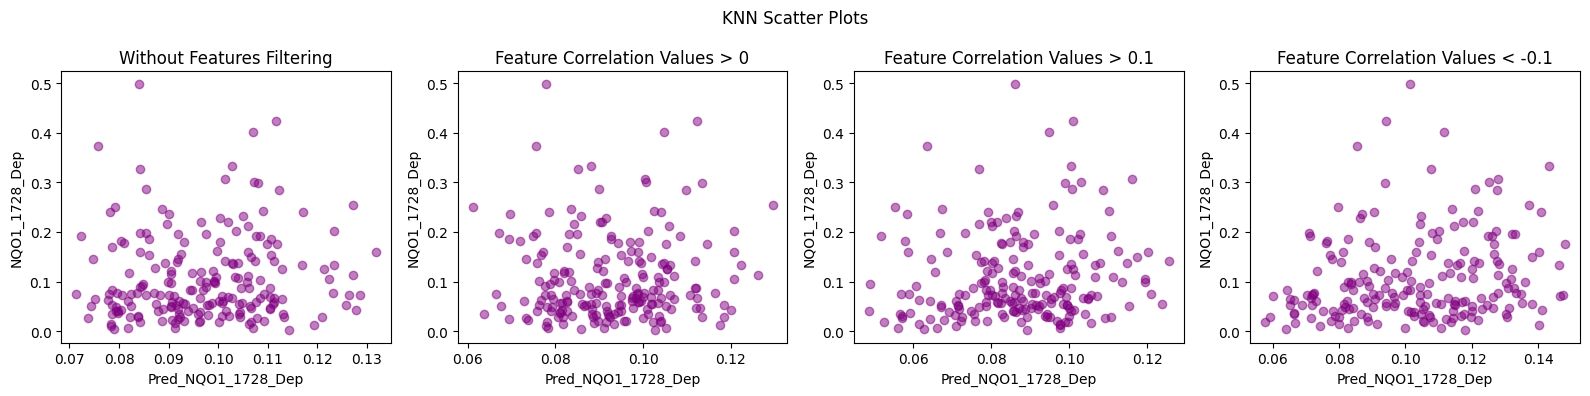

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/KNN_NQO1_filtered_arranged_table.csv',
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/KNN_NQO1_gt_00.csv',
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/KNN_NQO1_gt_01.csv',
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/KNN_NQO1_ng_01.csv'
]

dfs = []  # List to store the DataFrames

# Read each CSV file and append to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('KNN Scatter Plots')

# Create scatter plots
titles = ['Without Features Filtering', 'Feature Correlation Values > 0', 'Feature Correlation Values > 0.1',
          'Feature Correlation Values < -0.1']

for i, df in enumerate(dfs):
    ax = axs[i]  # Select the subplot
    ax.scatter(df['Pred_NQO1_1728_Dep'], df['NQO1_1728_Dep'],c='purple', alpha=0.5)
    ax.set_xlabel('Pred_NQO1_1728_Dep')
    ax.set_ylabel('NQO1_1728_Dep')
    ax.set_title(titles[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()
